## Лабораторная работа 4.2.2
# Интерферометр Жамена

In [29]:
import numpy as np
import scipy as ps
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Калибровка компенсатора

Выполним калибровку компенсатора, выделив узкий интервал длин волн с помощью светофильтра.

In [30]:
data1 = pd.read_excel('lab-422.xlsx', 'table-1')
pd.DataFrame(data1)

,"$z_m, мм$"
0,20.27
1,20.31
2,20.36
3,20.42
4,20.47
5,20.52
6,20.57
7,20.64
8,20.69
9,20.74


In [31]:
l = 100      # Длина кюветы (мм)
Lambda = 650 # Длина волны (нм)

По полученным значениям построим калибровочный график $z_m = f(m)$.

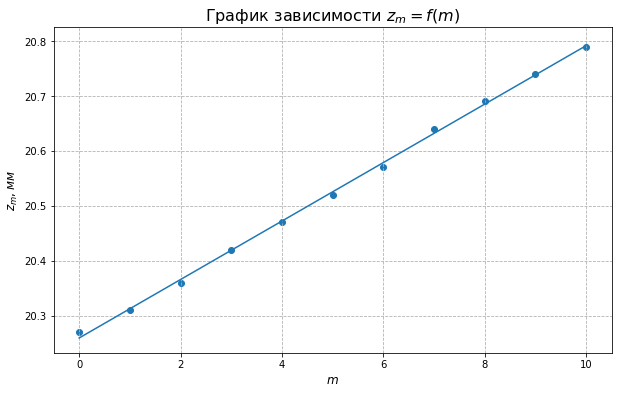

In [32]:
x1 = np.array(range(11))
y1 = np.array(data1.values[:, 0], dtype = float)

k1, b1 = np.polyfit(x1, y1, deg = 1)

plt.figure(figsize = (10, 6))
plt.title('График зависимости $z_m = f(m)$', fontsize=16)
plt.ylabel('$z_m, мм$', fontsize=12)
plt.xlabel('$m$', fontsize=12)

plt.scatter(x1, y1)
plt.plot(x1, x1 * k1 + b1)
plt.grid(linestyle = '--')

plt.show()

In [33]:
print('k1 =', k1, 'мм', '\nb1 =', b1, 'мм')

k1 = 0.05318181818181886 мм 
b1 = 20.259545454545446 мм


Рассчитаем среднее расстояние между соседними интерференционными полосами.

In [34]:
distance = 0
for i in range(10):
    distance += math.fabs(y1[i] - y1[i + 1])
distance /= 11
print(distance, 'мм')

0.04727272727272724 мм


### Зависимость  $\delta n$ от  $P$ воздуха

Снимем зависимость показаний компенсатора $\Delta z$ от перепада давлений $\Delta P$ и построим по полученным данным график $\Delta z = f(\Delta P)$.

In [35]:
data2 = pd.read_excel('lab-422.xlsx', 'table-2')
pd.DataFrame(data2)

,"$\Delta P, мм H_{2}O$","$z, мм$"
0,0,20.87
1,100,20.84
2,200,20.81
3,300,20.76
4,400,20.71
5,500,20.68
6,650,20.63
7,-100,20.90
8,-200,20.93
9,-300,20.97


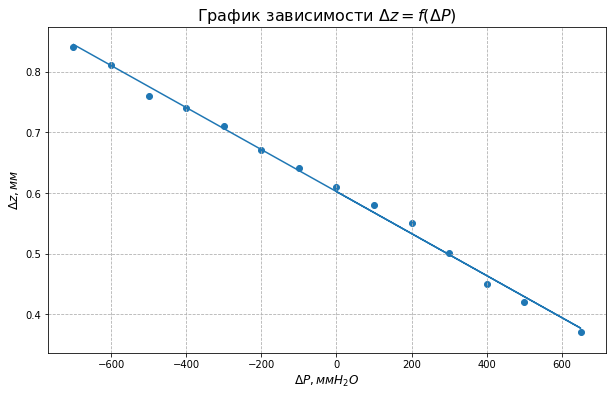

In [36]:
x2 = np.array(data2.values[:, 0], dtype = float)
y2 = np.array(data2.values[:, 1], dtype = float)
y2 = np.array([each - b1 for each in y2])

k2, b2 = np.polyfit(x2, y2, deg = 1)

plt.figure(figsize = (10, 6))
plt.title('График зависимости $\Delta z = f(\Delta P)$', fontsize=16)
plt.ylabel('$\Delta z, мм$', fontsize=12)
plt.xlabel('$\Delta P, мм H_2O$', fontsize=12)

plt.scatter(x2, y2)
plt.plot(x2, x2 * k2 + b2)
plt.grid(linestyle = '--')

plt.show()

In [37]:
print('k2 =', k2)

k2 = -0.0003461919646260582


Используя формулу $\delta n = \dfrac{\Delta}{l} = m \dfrac{\lambda}{l}$, где $m$ – число полос, на которые сместилась картина, перейдем от делений компенсатора $\Delta z$ к величине $\delta n$.

$\delta n = \dfrac{\Delta z}{d} \dfrac{\lambda}{l}$, $d$ – расстояние между соседними полосами  

Следовательно, $\dfrac{\delta n}{\Delta P} = \dfrac{\Delta z}{\Delta P} \dfrac{\lambda}{dl}$.

In [38]:
result = math.fabs(k2 * Lambda * 10**(-6) / (distance * l * (10**(-2) * 1.0197)))
print(result, '1/Б')

4.668176437783959e-06 1/Б


Рассчитаем среднюю поляризуемость молекулы: $\alpha = \dfrac{\delta n}{\Delta P} \dfrac{k_Б T}{2 \pi}$

In [39]:
alpha = result * 1.38 * 10**(-16) * (25 + 273.15) / (2 * math.pi) 
print(alpha)

3.056900436474742e-20


А также показатель преломления воздуха в условиях опыта по формуле $n - 1 = 2 \pi \alpha \dfrac{P}{k_Б T}$

In [40]:
result_n = 2 * math.pi * alpha * 101.3 * 1.01 / (1.38 * 10**(-16) * 298.15)
print(result_n)

0.00047761513587899027


Сравним результаты с табличными, пересчитав для лабораторных условий значения коэффициента преломления воздуха по следующей формуле: $\dfrac{n_0 - 1}{n - 1} = \dfrac{T P_0}{T_0 P}$, где $P_0 = 1 атм, T_0 = 273 K$.  
Тогда $n_0 - 1$:
    

In [41]:
result_n * (273 / 298)

0.0004375467519965246

Результаты совпадают с табличными (0.0002926) по порядку величины.

### Сравнение показателей преломления воздуха и углекислого газа при атмосферном давлении

Определим новое положении нулевой полосы после впускания углекислого газа:  
$z_0^{C O_2} = 16.44 мм$, следовательно: $\Delta z = z_0^{C O_2} - z_0 = (16.44 - 15.26) мм= 1.18 мм$

Рассчитаем показатель преломления углекислого газа по формуле $n = n_{возд} + \dfrac{\Delta}{l} = n_{возд}+ \dfrac{m \lambda}{l}$.

In [42]:
n = result_n + Lambda * 10**(-6) * 1.18 / (distance * l)
print(n)

0.0006398651358789903


Сравним результаты с табличными, пересчитав для лабораторных условий значения коэффициента преломления воздуха:

In [43]:
n * (273 / 298)

0.0005861851748153167

Результаты совпадают с табличными (0.0004506) по порядку величины.

Установка оказалась абсолютно герметичной (т.к. со временем полосы не смещались).